In [2]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


<img src="./img/4.png" alt="FAO" width="790">

单层神经网络

<img src="./img/5.png" alt="FAO" width="790">

## Tensorflow实现多层神经网路

In [5]:
inputSize = 784
numClasses = 10
X = tf.placeholder(tf.float32, shape = [None, inputSize])
y = tf.placeholder(tf.float32, shape = [None, numClasses])

In [6]:
numHiddenUnits = 256

W1 = tf.Variable(tf.truncated_normal([inputSize, numHiddenUnits], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1), [numHiddenUnits])
W2 = tf.Variable(tf.truncated_normal([numHiddenUnits, numClasses], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1), [numClasses])

In [7]:
hiddenLayerOutput = tf.matmul(X, W1) + B1
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)
finalOutput = tf.matmul(hiddenLayerOutput, W2) + B2
finalOutput = tf.nn.relu(finalOutput) 

In [8]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = finalOutput))
opt = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
correct_prediction = tf.equal(tf.argmax(finalOutput,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [13]:
trainingIterations = 10000
batchSize = 64
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(trainingIterations):
    batch = mnist.train.next_batch(batchSize)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict={X: batchInput, y: batchLabels})
    if i%1000 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
        print ("step %d, training accuracy %g"%(i, trainAccuracy))

step 0, training accuracy 0.265625
step 1000, training accuracy 0.90625
step 2000, training accuracy 0.9375
step 3000, training accuracy 0.96875
step 4000, training accuracy 0.96875
step 5000, training accuracy 0.984375
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 0.984375
step 9000, training accuracy 0.984375


两层神经网络

In [14]:
numHiddenUnitsLayer2 = 100
trainingIterations = 10000

X = tf.placeholder(tf.float32, shape = [None, inputSize])
y = tf.placeholder(tf.float32, shape = [None, numClasses])

W1 = tf.Variable(tf.random_normal([inputSize, numHiddenUnits], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1), [numHiddenUnits])
W2 = tf.Variable(tf.random_normal([numHiddenUnits, numHiddenUnitsLayer2], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1), [numHiddenUnitsLayer2])
W3 = tf.Variable(tf.random_normal([numHiddenUnitsLayer2, numClasses], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1), [numClasses])

hiddenLayerOutput = tf.matmul(X, W1) + B1
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)
hiddenLayer2Output = tf.matmul(hiddenLayerOutput, W2) + B2
hiddenLayer2Output = tf.nn.relu(hiddenLayer2Output)
finalOutput = tf.matmul(hiddenLayer2Output, W3) + B3

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = finalOutput))
opt = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(loss)

correct_prediction = tf.equal(tf.argmax(finalOutput,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(trainingIterations):
    batch = mnist.train.next_batch(batchSize)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict={X: batchInput, y: batchLabels})
    if i%1000 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
        print ("step %d, training accuracy %g"%(i, train_accuracy))

testInputs = mnist.test.images
testLabels = mnist.test.labels
acc = accuracy.eval(session=sess, feed_dict = {X: testInputs, y: testLabels})
print("testing accuracy: {}".format(acc))

step 0, training accuracy 0.265625
step 1000, training accuracy 0.96875
step 2000, training accuracy 1
step 3000, training accuracy 1
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 1
testing accuracy: 0.9786999821662903


## Pytorch实现二层神经网络

In [22]:
from torch  import nn
import torch.nn.functional as F

class Minist_NN(nn.Module):
    def __init__(self,in_channel,out_channel):
        super(Minist_NN,self).__init__()
        self.hiddenLine1 = nn.Linear(in_channel,128)
        self.hiddenLine2 = nn.Linear(128,256)
        self.out = nn.Linear(256,out_channel)
    
    def forward(self,x):
        x = F.relu(self.hiddenLine1(x))
        x = F.relu(self.hiddenLine2(x))
        x = self.out(x)
        return x

(50000, 784)


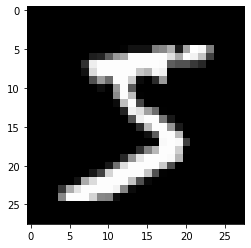

In [23]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
        
        
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)),cmap='gray')
print(x_train.shape)

import torch 
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def DataGet(x_train,y_train,x_valid,y_valid,batch):
    
    x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))
    train_dataset    = TensorDataset(x_train,y_train)
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    valid_dataset    = TensorDataset(x_valid,y_valid)
    valid_dataloader = DataLoader(dataset=valid_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    
    return train_dataloader,valid_dataloader

In [24]:
#模型获取 定义模型 优化器 损失函数
from torch import optim
def GetModelAndOpt():
    in_channel = 784
    out_channel = 10
    model = Minist_NN(in_channel,out_channel)
    #opt   = optim.Adam(model.parameters(),lr=0.001)
    opt   = optim.SGD(model.parameters(),lr=0.001)
    loss_func = F.cross_entropy
    return model,opt,loss_func

#定义损失函数执行
def loss_batch(model,x_data,y_data,loss_func,opt=None):
    if model:
        loss = loss_func(model(x_data),y_data)
    else:
        print('model is not exist')
        return 
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        

    return loss.item(),len(x_data)

# 模型训练
def model_fit(steps,model,opt,loss_func,train_dataloader,valid_dataloader):
    for step in range(steps):
        model.train()
        for x,y in train_dataloader:
            loss_batch(model,x,y,loss_func,opt)
        
        model.eval()
        #更改参数属性，使参数不反向传播、更新 如果此时还进行反向传播会出现element 0 have no grad的错误
        with torch.no_grad():
            losses,nums = zip(*[loss_batch(model,x,y,loss_func) for x,y in valid_dataloader])
        val_loss = np.sum(np.multiply(losses,nums)/np.sum(nums))
        print('当前step='+str(step),' 验证集损失值：'+str(val_loss))
    
    torch.save(model.state_dict(),'model.pkl')

batch = 64
train_dataloader,valid_dataloader = DataGet(x_train,y_train,x_valid,y_valid,batch)
model,opt,loss_func = GetModelAndOpt()
steps = 25
model_fit(steps,model,opt,loss_func,train_dataloader,valid_dataloader)

当前step=0  验证集损失值：2.278511262512207
当前step=1  验证集损失值：2.2443044460296626
当前step=2  验证集损失值：2.19052292175293
当前step=3  验证集损失值：2.102170663833618
当前step=4  验证集损失值：1.9590869409561158
当前step=5  验证集损失值：1.7457384288787843
当前step=6  验证集损失值：1.484122947692871
当前step=7  验证集损失值：1.2365941829681397
当前step=8  验证集损失值：1.041428999519348
当前step=9  验证集损失值：0.8979174104690552
当前step=10  验证集损失值：0.7909946117401123
当前step=11  验证集损失值：0.7103542280197145
当前step=12  验证集损失值：0.6474472969055176
当前step=13  验证集损失值：0.5977427173614502
当前step=14  验证集损失值：0.5576216386795044
当前step=15  验证集损失值：0.5245774828910827
当前step=16  验证集损失值：0.4978057392597199
当前step=17  验证集损失值：0.47540359649658204
当前step=18  验证集损失值：0.45608646697998045
当前step=19  验证集损失值：0.4399733902931213
当前step=20  验证集损失值：0.4262361519813538
当前step=21  验证集损失值：0.413517134141922
当前step=22  验证集损失值：0.4028465699672699
当前step=23  验证集损失值：0.3936218783378601
当前step=24  验证集损失值：0.38549459419250487


Minist_NN(
  (hiddenLine1): Linear(in_features=784, out_features=128, bias=True)
  (hiddenLine2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)
tensor([-0.0407,  0.0361, -0.0090, -0.0053,  0.1120, -0.0126,  0.0952,  0.0154,
        -0.0615,  0.0736], grad_fn=<AddBackward0>)
tensor([-1.5295,  2.8751,  4.2068,  5.9994, -4.5206,  2.6120, -0.0490, -4.3164,
         3.2733, -3.8552], grad_fn=<AddBackward0>)


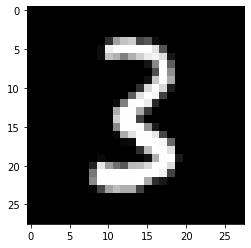

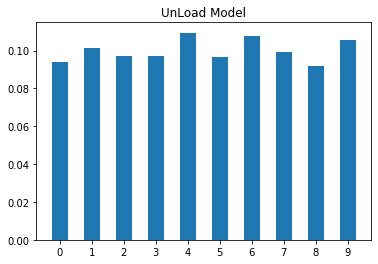

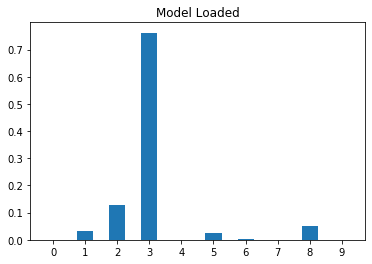

In [25]:
def Softmax(list):
    sum_exp = np.sum([np.exp(i) for i in  list])
    result = [np.exp(i)/sum_exp for i  in list]
    return result

import seaborn as sns
import matplotlib.pyplot as  plt

def model_load():
    #创建一个新的model
    model,opt,loss_func = GetModelAndOpt()
    print(model)
    pyplot.imshow(x_valid[0].reshape((28,28)),cmap='gray')
    
    #查看器预测结果
    predict = model(torch.Tensor(x_valid[0]))
    print(predict)
    #输出类型为 tensor 且附带可求导属性，因此需要使用predict.detach().numpy()将predict转换成numpy形式
    predict_result = Softmax(np.array(predict.detach().numpy()))
    fig,axes = plt.subplots()
    axes.bar(x=[i for i in range(10)],height=predict_result,width = 0.5,tick_label=[i for i in range(10)])
    axes.set_title('UnLoad Model')
    #load已经训练完成的模型
    model.load_state_dict(torch.load('model.pkl'))
    
    predict = model(torch.Tensor(x_valid[0]))
    print(predict)
    predict_result = Softmax(np.array(predict.detach().numpy()))
    fig,axes = plt.subplots()
    axes.bar(x=[i for i in range(10)],height=predict_result,width = 0.5,tick_label=[i for i in range(10)])
    axes.set_title('Model Loaded')  

model_load()